## _`Exploratory Data Analysis of Titanic Dataset`_


### _`Import Libraries and Data Loading`_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'seaborn-v0_8')
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### _`Missing Handling`_


In [5]:
# Percentage of Missing Values
round((df.isnull().sum() / df.shape[0]) * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

- _Cabin Column is not beneficial as it has many missing values, so we will drop this column_
- _Age Column has less number of missing values, so we can fill it with Median_
- _Fare Column has small percentage of missing values, so we will drop these rows_


In [6]:
df = df.drop(columns='Cabin', axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())

df = df.dropna()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


### _`Visualization of Categorical Variables (Bar Plot)`_


In [8]:
# Separate Numeric Columns From Categorical
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [9]:
for col in cat_cols:
    print(f"{col} has", df[col].nunique(), "Unique Values")

Name has 417 Unique Values
Sex has 2 Unique Values
Ticket has 362 Unique Values
Embarked has 3 Unique Values


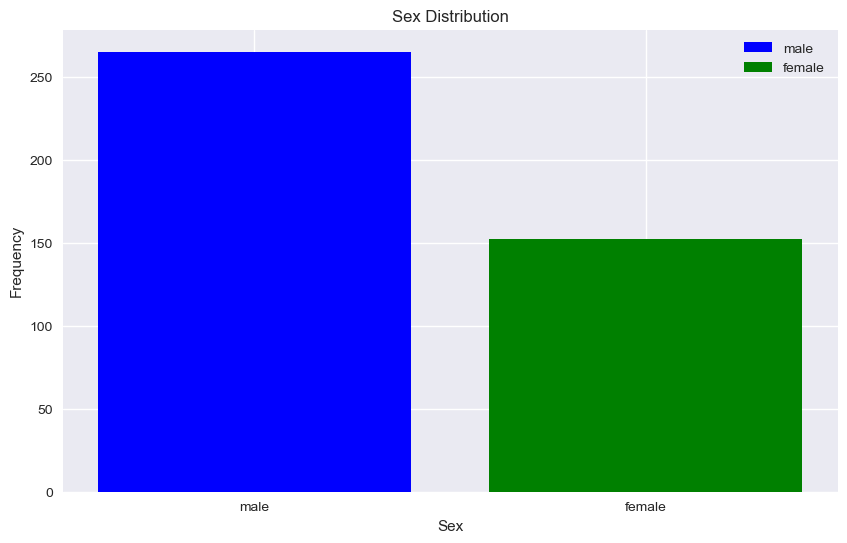

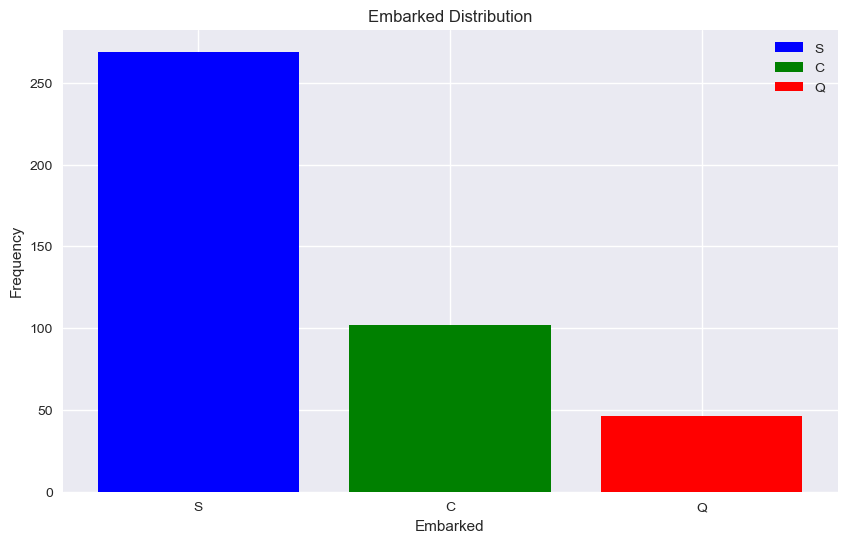

In [10]:
for col in cat_cols:
    if col != 'Name' and col != 'Ticket':
        counts = df[col].value_counts()
        plt.figure(figsize=(10, 6))
        plt.bar(counts.index, counts.values, label=counts.index,
                color=['blue', 'green', 'red'])
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

### _`Visualization of Numerical Variables (Histogram)`_


In [11]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
survived_counts = df['Survived'].value_counts()
survived_counts

Survived
0    265
1    152
Name: count, dtype: int64

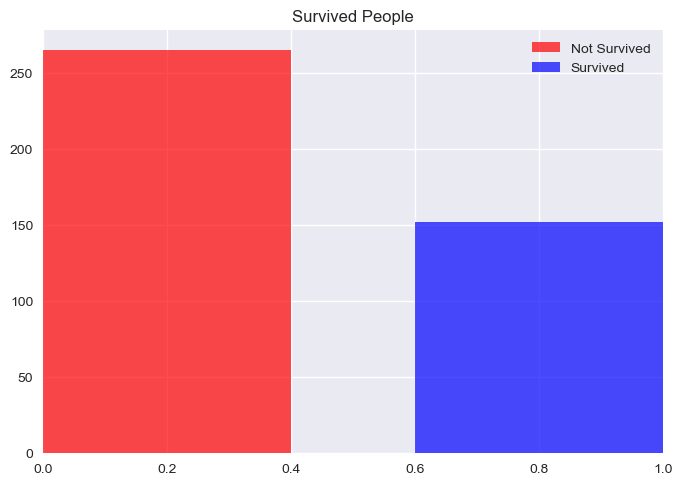

In [13]:
plt.bar(survived_counts.index, survived_counts.values,
        label=survived_counts.index, color=['red', 'blue'], alpha=0.7)
plt.title('Survived People')
plt.xlim([0, 1])
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [14]:
pclass_counts = df['Pclass'].value_counts()
pclass_counts

Pclass
3    217
1    107
2     93
Name: count, dtype: int64

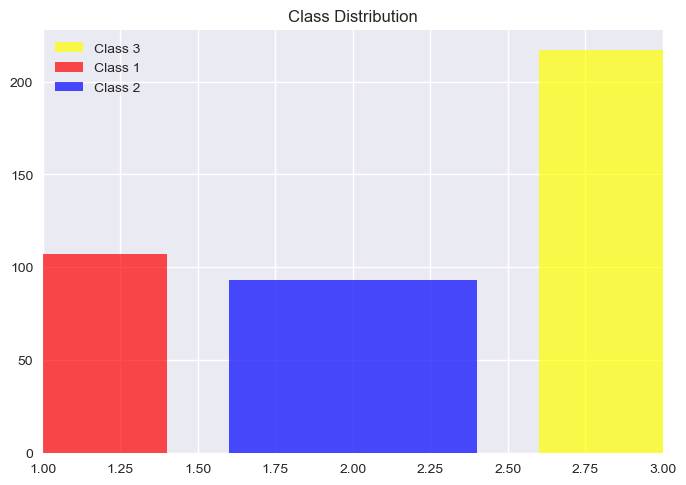

In [15]:
plt.bar(pclass_counts.index, pclass_counts.values,
        label=pclass_counts.index, color=['yellow', 'red', 'blue'], alpha=0.7)
plt.title('Class Distribution')
plt.xlim([1, 3])
plt.legend(['Class 3', 'Class 1', 'Class 2'])
plt.show()

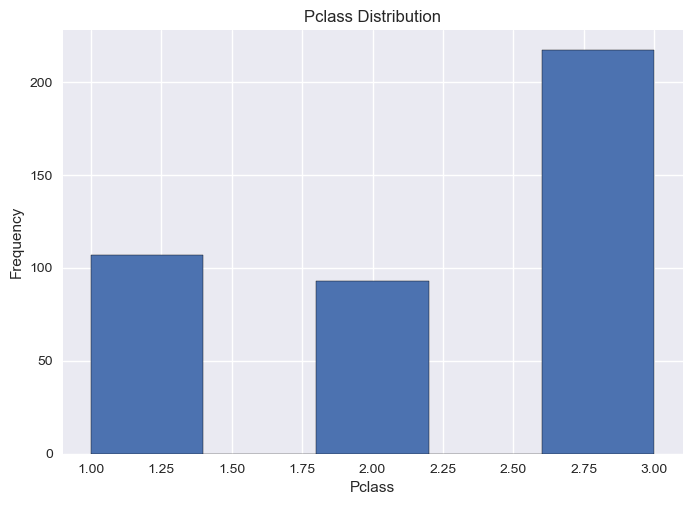

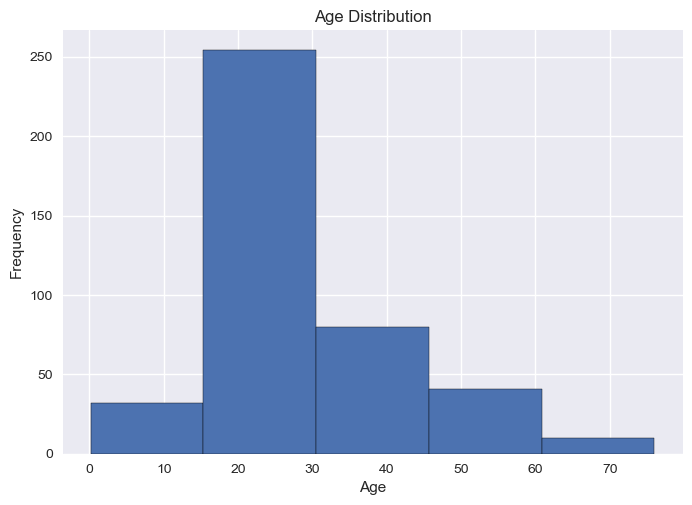

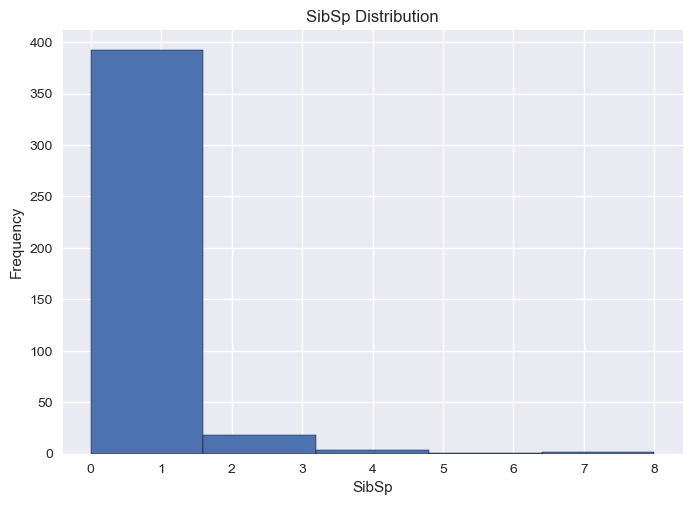

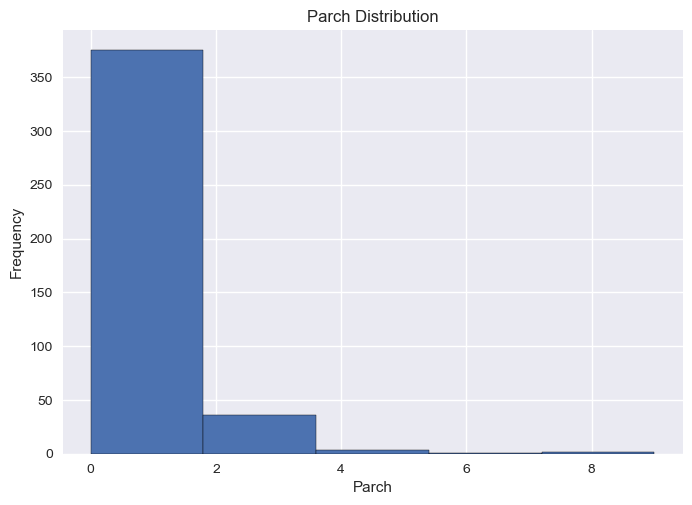

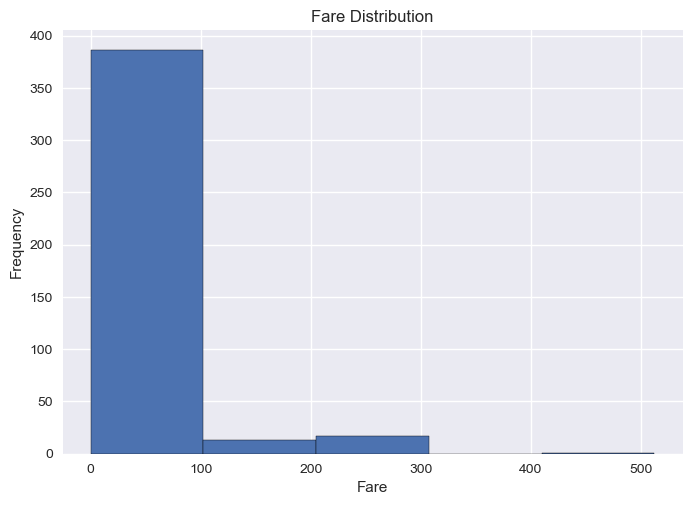

In [16]:
for col in num_cols:
    if col != 'PassengerId' and col != 'Survived':
        plt.hist(df[col], bins=5, edgecolor='black')
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

### _`Pie Chart with Categorical Variables`_


In [17]:
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

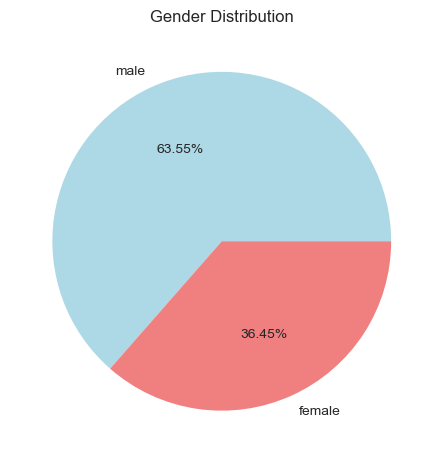

In [18]:
plt.pie(df['Sex'].value_counts().values, labels=df['Sex'].value_counts(
).index, autopct='%1.2f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

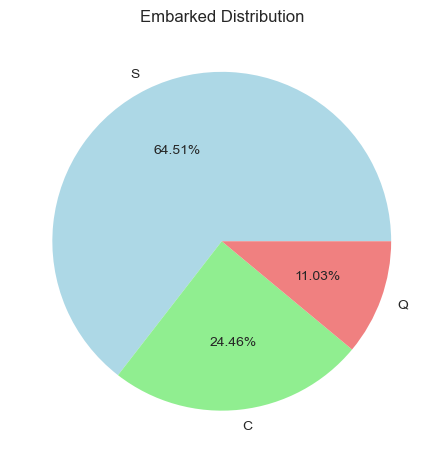

In [19]:
plt.pie(df['Embarked'].value_counts().values, labels=df['Embarked'].value_counts(
).index, autopct='%1.2f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Embarked Distribution')
plt.show()

### _`Explore the Realtionships between variables (Scatter Plot)`_


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


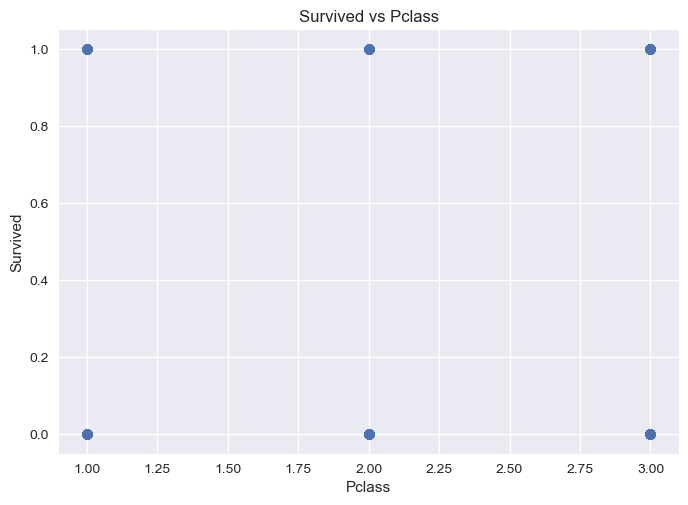

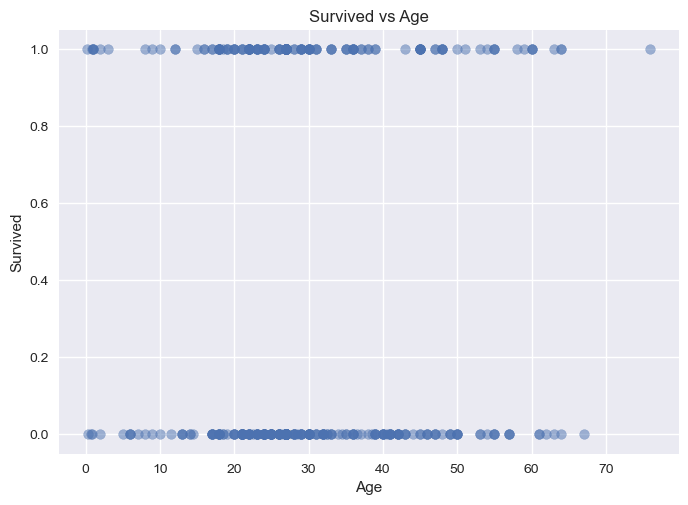

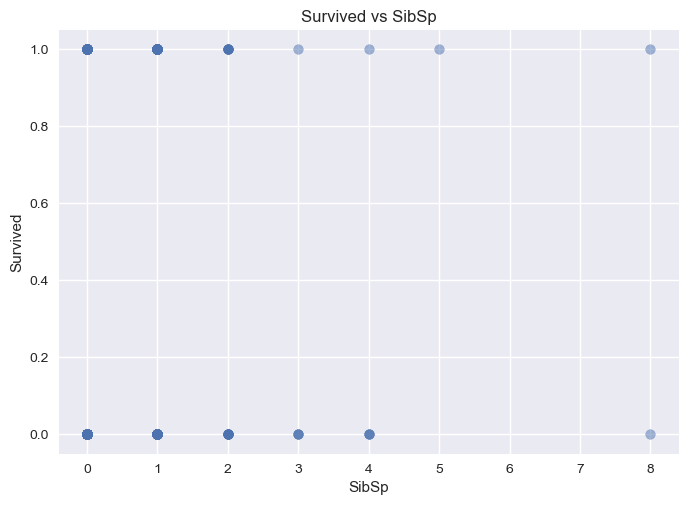

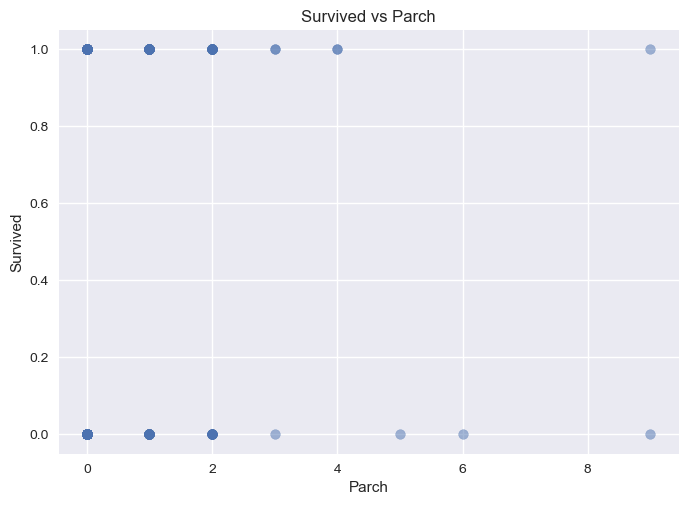

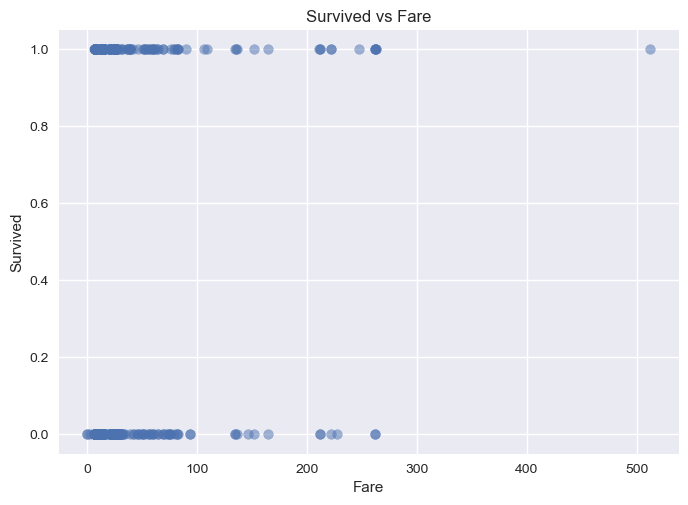

In [21]:
for col in num_cols:
    if col not in ('Survived', 'PassengerId'):
        plt.scatter(df[col], df['Survived'], alpha=0.5)
        plt.title(f"Survived vs {col}")
        plt.xlabel(col)
        plt.ylabel('Survived')
        plt.show()

### _`Correlation Heatmap`_


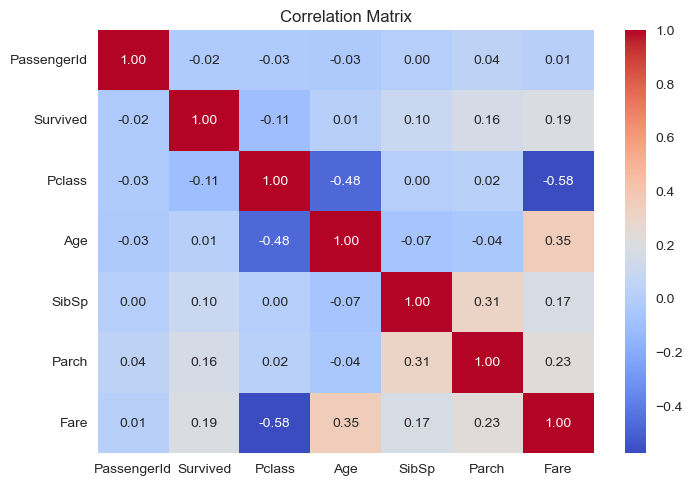

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### _`Some Questions on Data and Answers by Visualization`_


_`How many passengers ?`_


In [23]:
print(f"Number of Passengers: {df.shape[0]}")   # len(df) == df.shape[0]

Number of Passengers: 417


_`Distribution of passengers by gender`_


In [24]:
gender_counts = df['Sex'].value_counts()
gender_counts

Sex
male      265
female    152
Name: count, dtype: int64

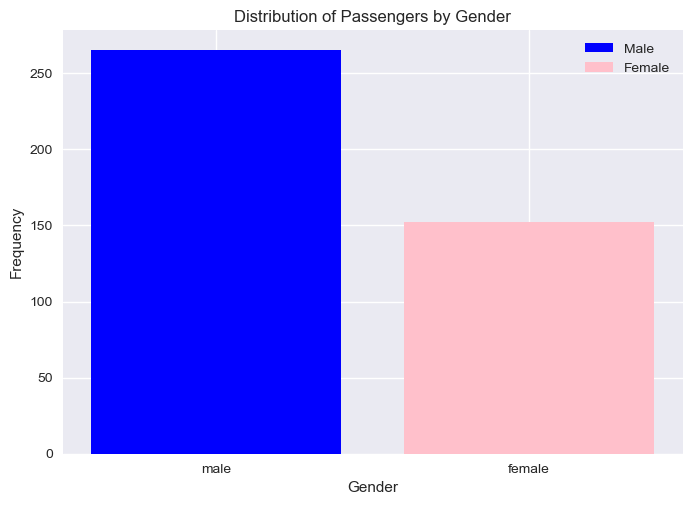

In [25]:
plt.bar(gender_counts.index, gender_counts.values,
        label=gender_counts.index, color=['blue', 'pink'])
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(['Male', 'Female'])
plt.show()

- _`Distribution of passengers by age`_
- _`Minimum of Age`_
- _`Maximum of Age`_


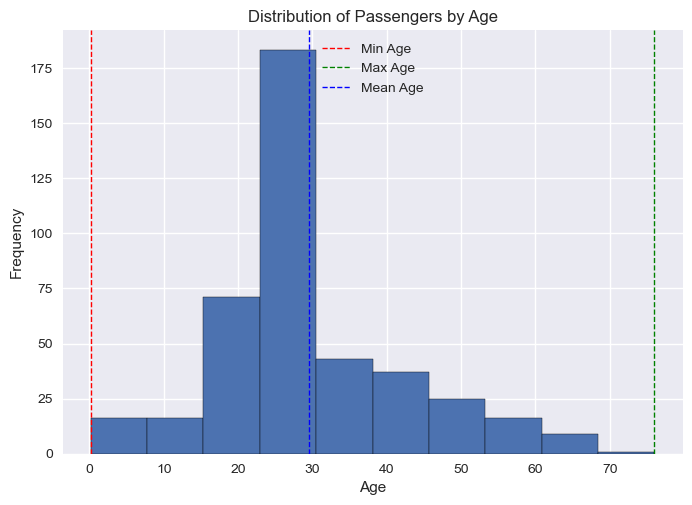

In [26]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['Age'].min(), color='red',
            linestyle='dashed', linewidth=1, label='Min Age')
plt.axvline(df['Age'].max(), color='green',
            linestyle='dashed', linewidth=1, label='Max Age')
plt.axvline(df['Age'].mean(), color='blue',
            linestyle='dashed', linewidth=1, label='Mean Age')
plt.legend()
plt.show()

_`Distribution of Ticket Prices`_


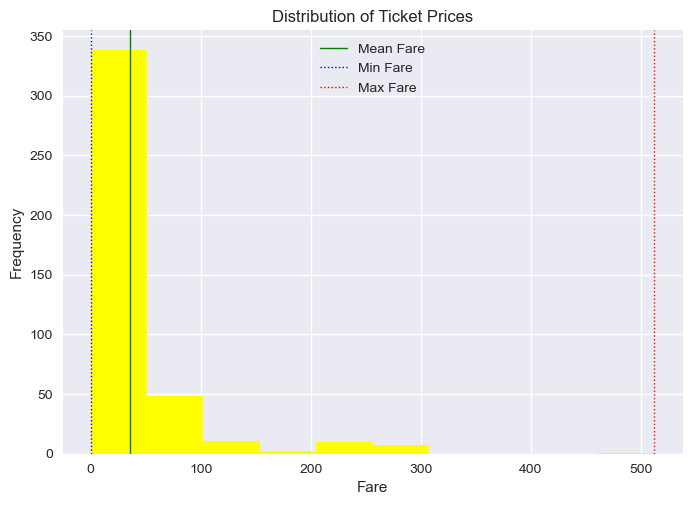

In [27]:
plt.hist(df['Fare'], bins=10, color='yellow')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.axvline(df['Fare'].mean(), color='green',
            linestyle='solid', linewidth=1, label='Mean Fare')
plt.axvline(df['Fare'].min(), color='blue',
            linestyle='dotted', linewidth=1, label='Min Fare')
plt.axvline(df['Fare'].max(), color='red',
            linestyle='dotted', linewidth=1, label='Max Fare')
plt.legend()
plt.show()

_`Passenger distribution by port (Embarked)`_


In [28]:
port_counts = df['Embarked'].value_counts()
port_counts

Embarked
S    269
C    102
Q     46
Name: count, dtype: int64

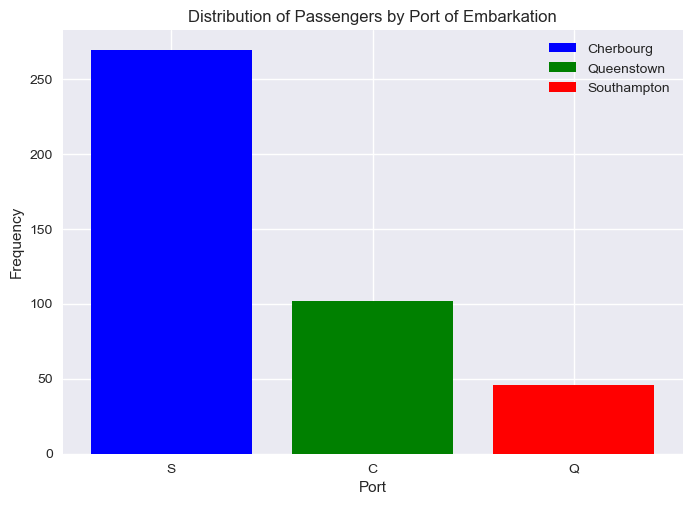

In [29]:
plt.bar(port_counts.index, port_counts.values,
        label=port_counts.index, color=['blue', 'green', 'red'])
plt.title('Distribution of Passengers by Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('Frequency')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

_`Compare ticket prices from each port.`_


In [30]:
mean_fare_per_port = df.groupby('Embarked')['Fare'].mean()

print(type(mean_fare_per_port))
mean_fare_per_port

<class 'pandas.core.series.Series'>


Embarked
C    66.259765
Q    10.957700
S    28.230436
Name: Fare, dtype: float64

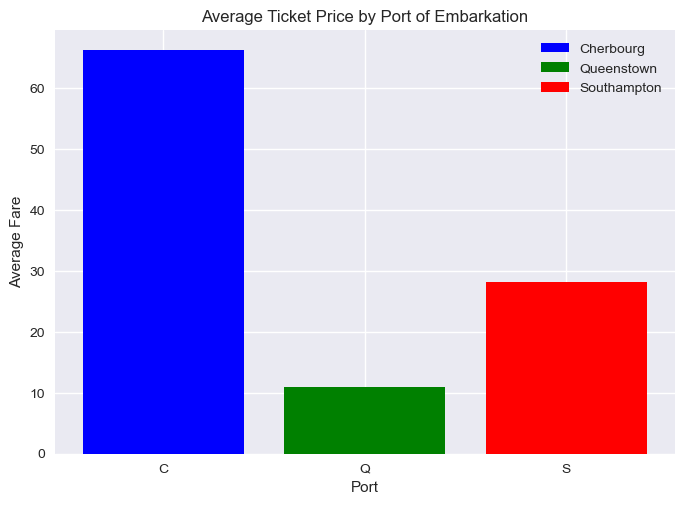

In [31]:
plt.bar(mean_fare_per_port.index, mean_fare_per_port.values,
        label=mean_fare_per_port.index, color=['blue', 'green', 'red'])
plt.title('Average Ticket Price by Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('Average Fare')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

_`How many are traveling with siblings/spouses (SibSp)?`_


In [32]:
sibsp_counts = df['SibSp'].value_counts()
sibsp_counts

SibSp
0    282
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

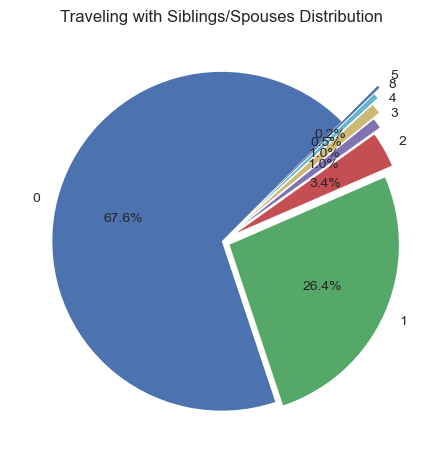

In [33]:
plt.pie(sibsp_counts.values, labels=sibsp_counts.index, autopct='%1.1f%%',
        startangle=45, explode=np.arange(len(sibsp_counts))*0.05)
plt.title('Traveling with Siblings/Spouses Distribution')
plt.show()

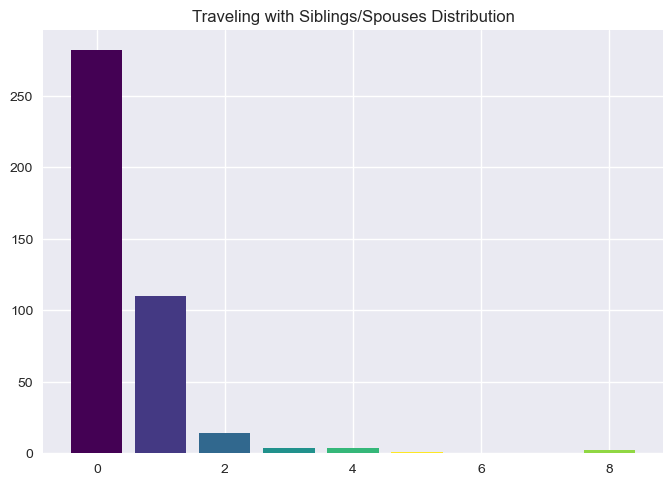

In [34]:
colors = plt.cm.viridis(np.linspace(0, 1, len(sibsp_counts)))
plt.bar(sibsp_counts.index, sibsp_counts.values,
        label=sibsp_counts.index, color=colors)
plt.title('Traveling with Siblings/Spouses Distribution')
plt.show()

_`How many are traveling with children/parents (Parch)?`_


In [35]:
parch_counts = df['Parch'].value_counts()
parch_counts

Parch
0    323
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

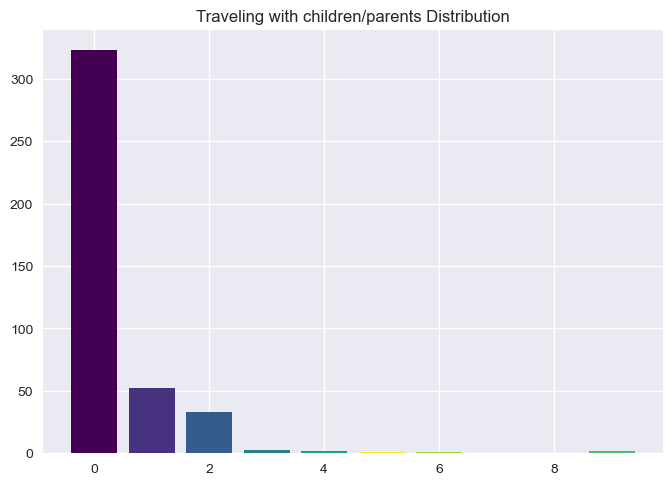

In [36]:
colors = plt.cm.viridis(np.linspace(0, 1, len(parch_counts)))
plt.bar(parch_counts.index, parch_counts.values,
        label=parch_counts.index, color=colors)
plt.title('Traveling with children/parents Distribution')
plt.show()

### *`Univariate Analysis`*

*Outliers Distribution -> Box Plot*

In [37]:
num_cols, cat_cols

(Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object'))

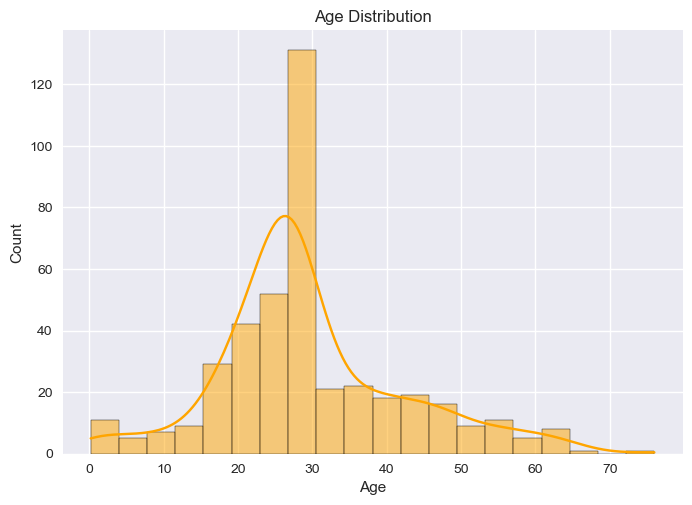

In [48]:
sns.histplot(df["Age"].dropna(), bins=20, kde=True, color="orange")
plt.title("Age Distribution")
plt.show()

### *`Bivariate Analysis`*

*Survival Rate vs. Gender*

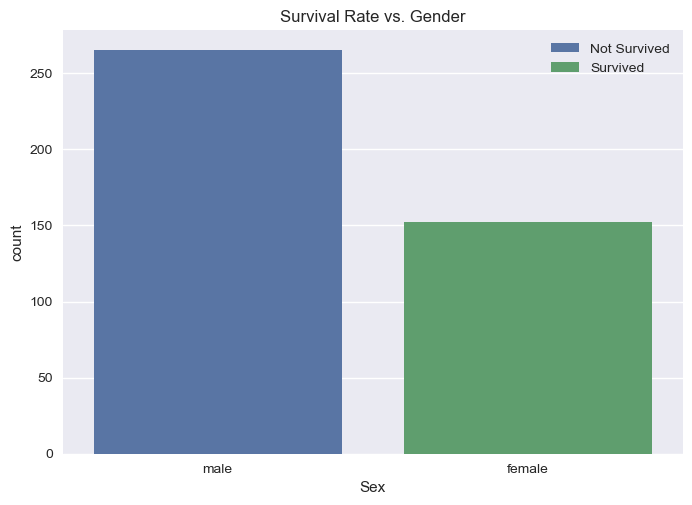

In [38]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate vs. Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()

*Survival Rate vs. Passenger Class*

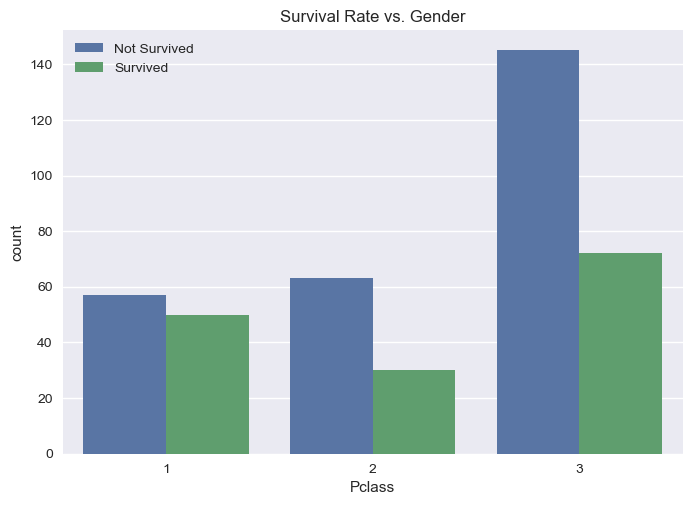

In [39]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate vs. Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()

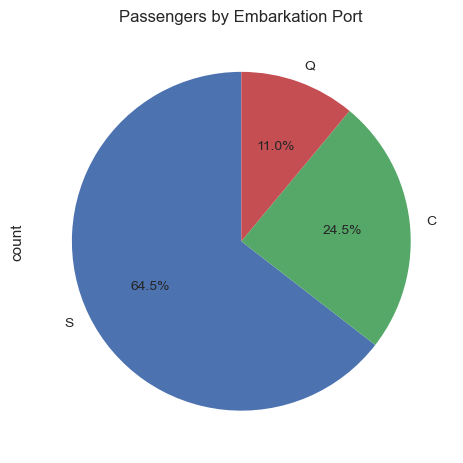

In [45]:
df['Embarked'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Passengers by Embarkation Port")
plt.show()

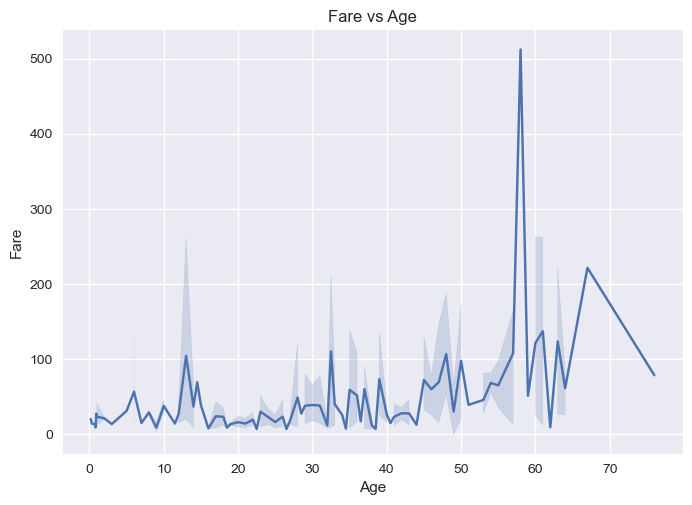

In [44]:
sns.lineplot(x="Age", y="Fare", data=df)
plt.title("Fare vs Age")
plt.show()

C:\Users\mr\AppData\Local\Temp\ipykernel_21900\2754669732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="Set2")


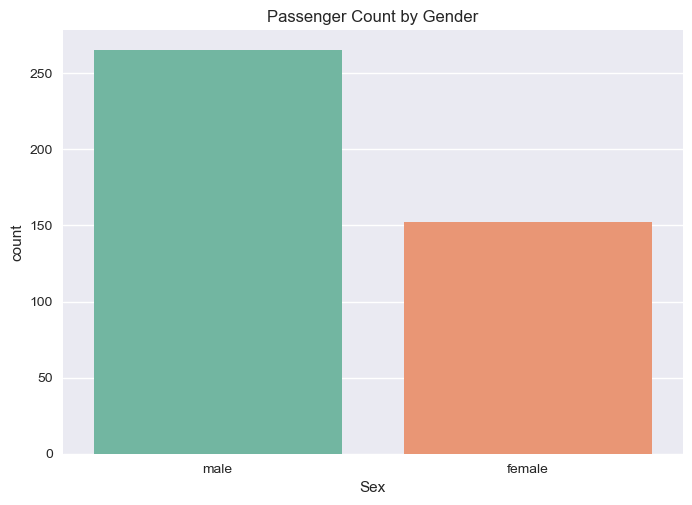

In [47]:
sns.countplot(x="Sex", data=df, palette="Set2")
plt.title("Passenger Count by Gender")
plt.show()

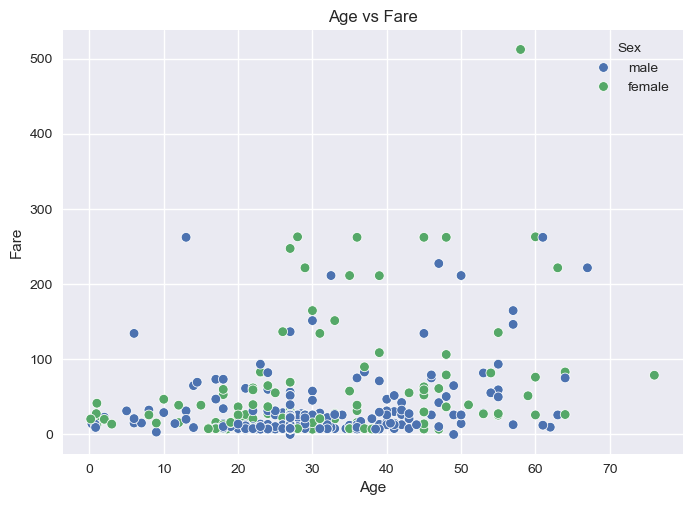

In [49]:
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.title("Age vs Fare")
plt.show()

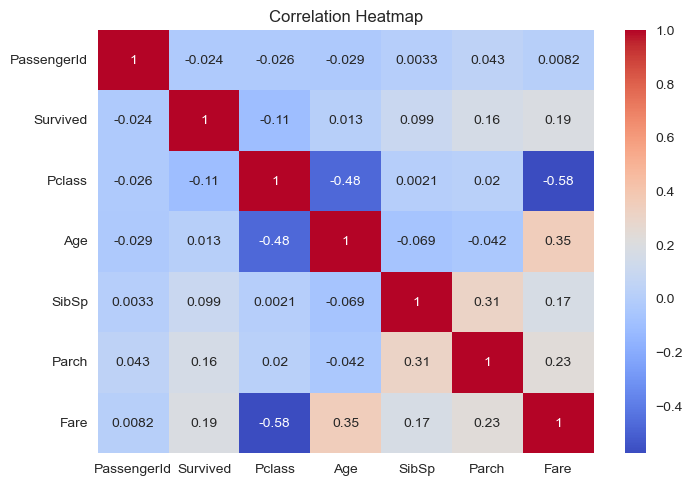

In [50]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()